In [1]:
import sys
sys.path.insert(1, '../') # add to path a folder one layer upper, where we have something useful

import numpy as np
import pandas as pd
import networkx as nx

from numpy import linalg as LA
from itertools import permutations

import matplotlib.pyplot as plt
import seaborn as sns

import pickle
from tqdm import tqdm
from time import time, ctime
from datetime import date

import sa
from graspologic.match import GraphMatch as GMP

In [2]:

def QAP(B, init='rand', n_init=1, max_iter=30, n_jobs=1):

    n = B.shape[0]

    if isinstance(init,(list,np.ndarray)):
        init = permMatrix(init)

    # gmp = GMP(max_iter=30, init='rand', n_init=1, n_jobs=1) #(max_iter=20, n_init=30, init='rand')
    gmp = GMP(max_iter=max_iter, init=init, n_init=n_init, n_jobs=n_jobs) 
    gmp = gmp.fit(B,B)
    sym = B[np.ix_(gmp.perm_inds_, gmp.perm_inds_)]
    qap = np.sum(abs(B-sym))/(n*(n-1))
    return gmp.perm_inds_, qap

def permMatrix(perm):
    '''
    Construct permutation matrix from permutation vector
    '''
    Im = np.eye(len(perm))
    return Im[:,perm]

def compES(A,perm):
    '''
    Compute E(A) (1.1) and S(A) (1.2) from Straka_BP_symmetry.pdf
    '''
    P = permMatrix(perm)
    N = len(perm)
    E = 1/4 * LA.norm(A - P @ A @ P.T, 'fro')**2
    S = 4*E/(N*(N-1))
    return E, S

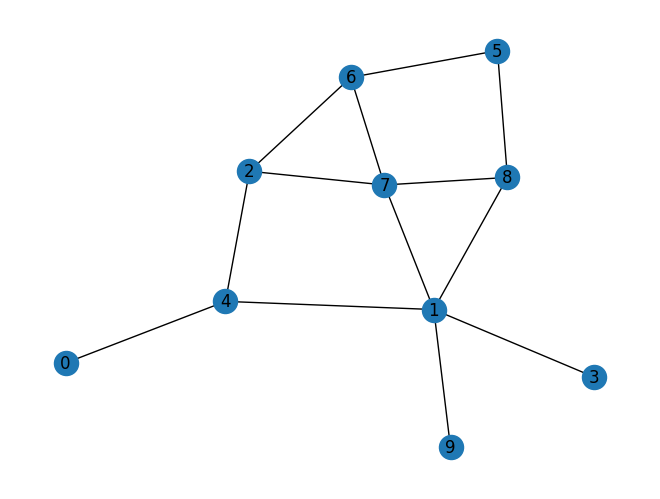

In [3]:
nNodes = 10
mEdges = 13

G0 = nx.gnm_random_graph(nNodes, mEdges)
# G0 = nx.barabasi_albert_graph(nNodes, 5)
A = nx.to_numpy_array(G0)

nx.draw(G0, labels = {x:x for x in G0.nodes()})

In [4]:
# QAP
# in the paper I used n_init = 30
permQAP, S = QAP(A)
print('Approximate symmetry: ' + str(S))

print(np.arange(nNodes))
print(permQAP)
print(np.sum(permQAP == np.arange(10)))

Approximate symmetry: 0.17777777777777778
[0 1 2 3 4 5 6 7 8 9]
[7 1 5 3 8 6 0 4 2 9]
3


In [5]:
# Annealing
import sa as sa

perm, S = sa.annealing(A, fp=6, steps = 4200)

print('Approximate symmetry: ' + str(S))

print(np.arange(nNodes))
print(perm)
print(np.sum(perm == np.arange(nNodes)))    

Approximate symmetry: 0.13333333333333333
[0 1 2 3 4 5 6 7 8 9]
[9, 4, 8, 0, 1, 6, 5, 7, 2, 3]
1
